In [1]:
# Importing basic libraries for data manipulation and analysis
import numpy as np                # For numerical operations
import pandas as pd # For data manipulation and analysis

#Testing the commit 

# Importing libraries for data visualization
import matplotlib.pyplot as plt   # For basic plotting
import seaborn as sns             # For advanced and aesthetically pleasing visualizations

# Importing libraries for handling dates and times
import datetime                   # For datetime operations
import calendar                   # For calendar-related operations

# Importing libraries for statistical analysis
import scipy.stats as stats       # For statistical tests and distributions
from statsmodels.tsa.stattools import adfuller  # For time series analysis (stationarity test)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # For autocorrelation and partial autocorrelation plots

# Setting up display options
pd.set_option('display.max_columns', None)  # Display all columns in DataFrame
pd.set_option('display.max_rows', 100)  # Set the number of rows to display
sns.set(style="whitegrid")  # Set Seaborn style for plots

# Warnings
import warnings
warnings.filterwarnings("ignore")  # Ignore warnings to keep the output clean

In [2]:
sales_df = pd.read_csv("/Users/Jamie/OneDrive/Documents/python_ws/project_delta/data/processed_data/sales_data.csv")

In [6]:
sales_df = sales_df.drop(['Unnamed: 0'], axis = 1)

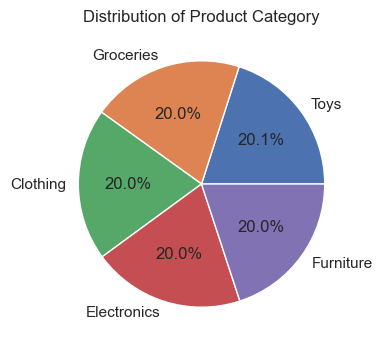

In [7]:
# Aggregate the data to get counts for each Traffic Source
traffic_counts = sales_df['product_category'].value_counts()

# Plot the pie chart
plt.figure(figsize=(10, 4))
plt.pie(traffic_counts, labels=traffic_counts.index, autopct='%1.1f%%')

# Add a title
plt.title('Distribution of Product Category')

# Display the plot
plt.show()

In [16]:
sales_df['sales'] = sales_df['unit_price'] * sales_df['quantity']

In [17]:
# Convert transaction_date to date-only format
sales_df['transaction_date'] = pd.to_datetime(sales_df['transaction_date']).dt.date

In [18]:
def category_sales(product_name, sales_df):
  if product_name != None:
    category_sales_df = sales_df[sales_df['product_category'] == product_name][['transaction_date', 'sales']]
  else:
    category_sales_df = sales_df
    

  # Step 2: Group by transaction_date and aggregate relevant columns
  aggregated_sales_df = category_sales_df.groupby('transaction_date').agg({
      'sales': 'sum',
      # Add more aggregations if necessary
  }).reset_index()

  # Step 3: Sort by transaction_date
  sales_df = aggregated_sales_df.sort_values(by=['transaction_date'])

  aggregated_sales_df.set_index('transaction_date',inplace=True)
  
  return aggregated_sales_df

def calculate_moving_average(df):
    # Calculate moving averages
  df['MA_20'] = df['sales'].rolling(window=20).mean()
  
  return df

def visualize_sales_df(sales_df, title):
  
  sales_df = calculate_moving_average(sales_df)
  # Plot the sales and moving averages
  plt.figure(figsize=(14, 8))
  plt.plot(sales_df['sales'], label='Daily Sales', color='lightgray')
  plt.plot(sales_df['MA_20'], label='20-Day MA', color='blue')
  plt.title(title)
  plt.xlabel('Transaction Date')
  plt.ylabel('Sales')
  plt.legend()
  plt.xticks(rotation=45)
  plt.grid(True)
  plt.show()

In [19]:
sales_df_all = category_sales(None, sales_df)


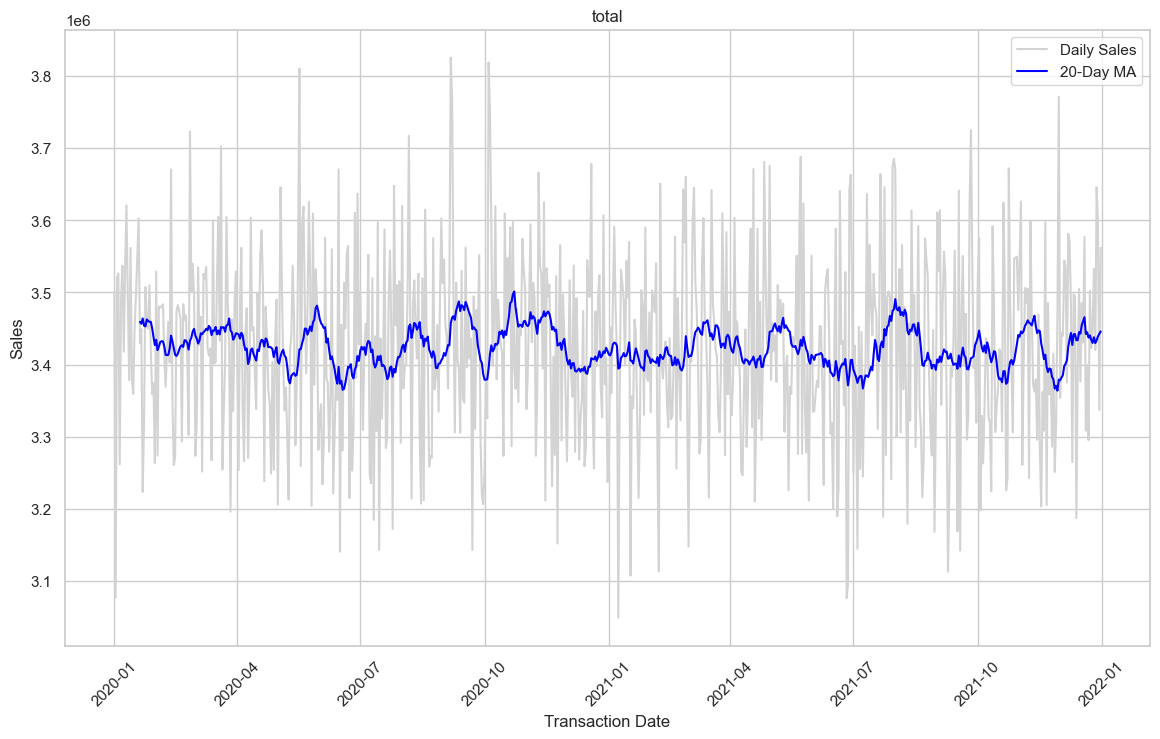

In [21]:
visualize_sales_df(sales_df_all, 'total')

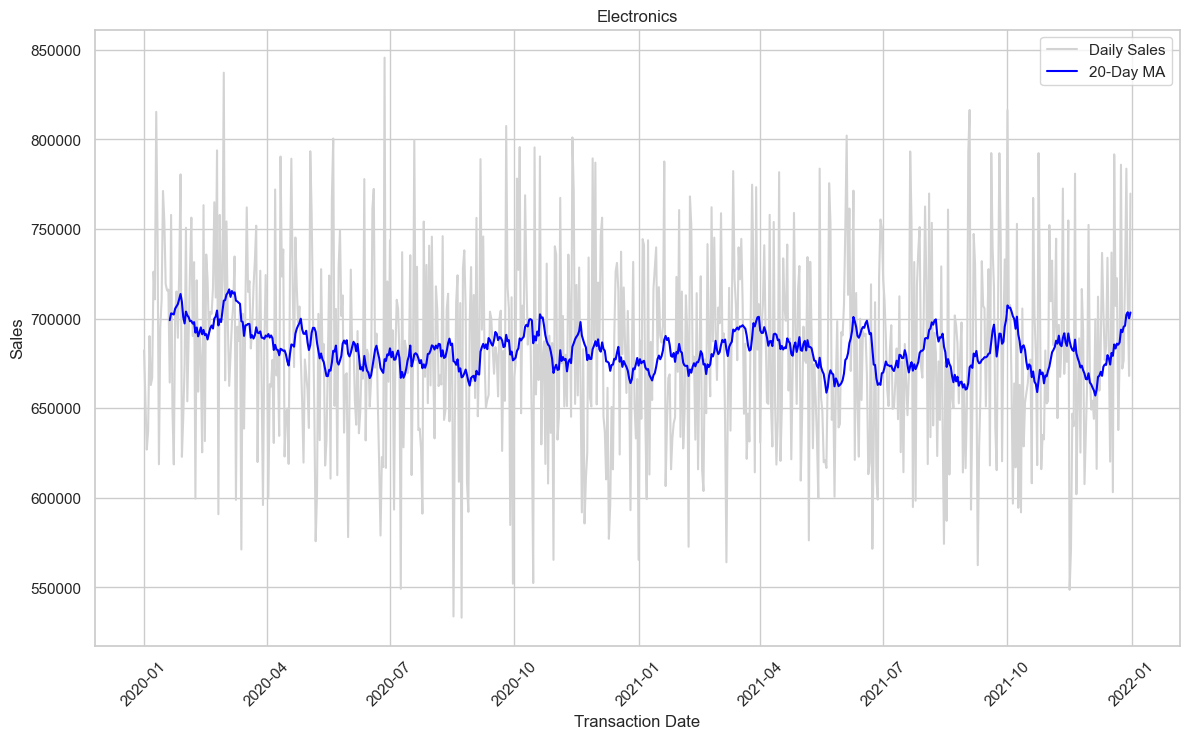

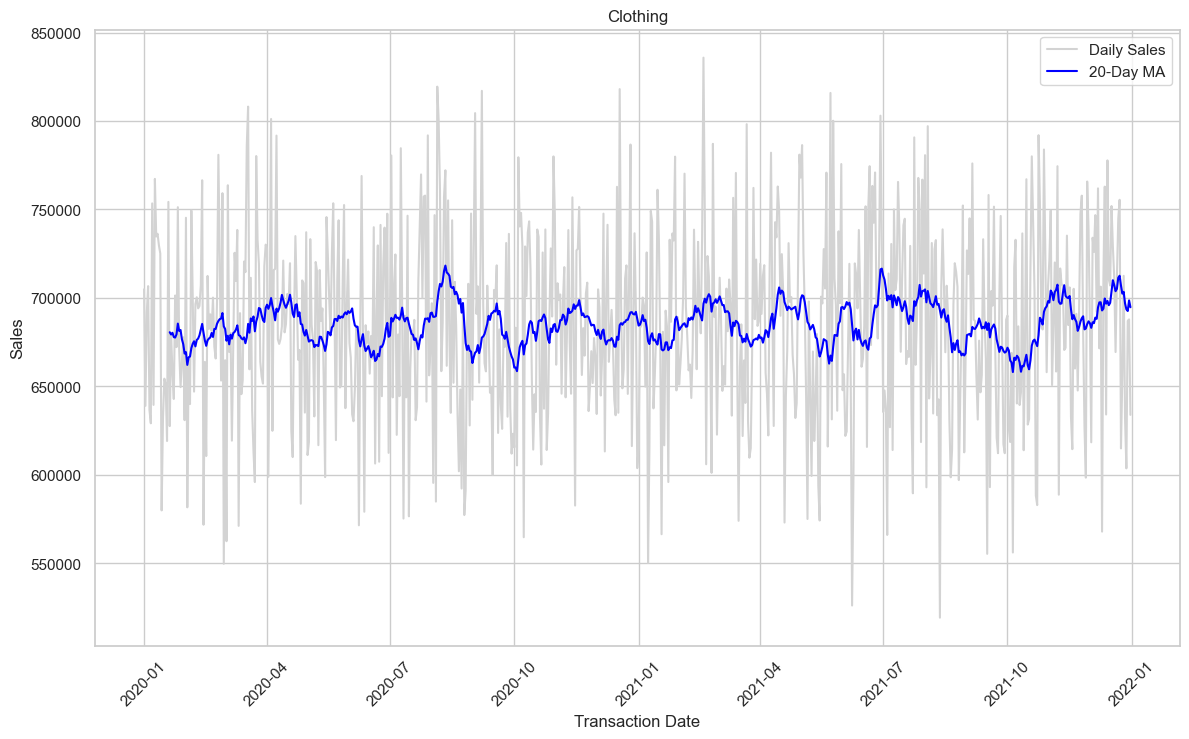

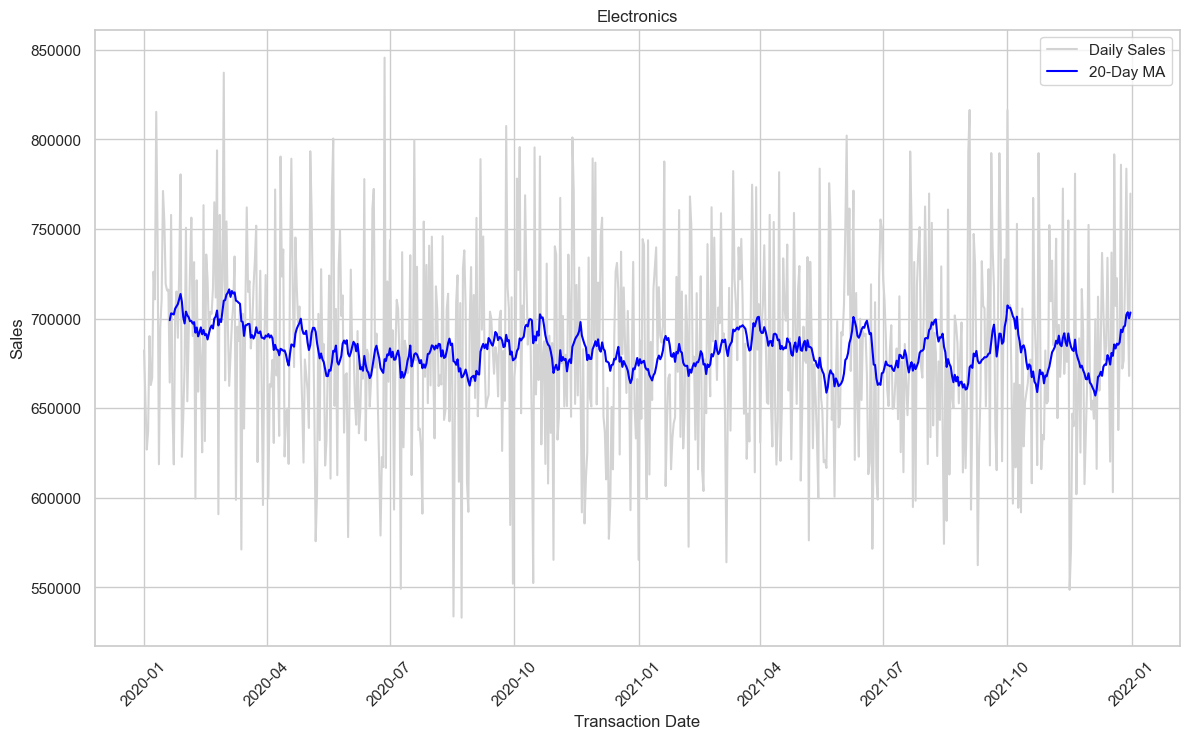

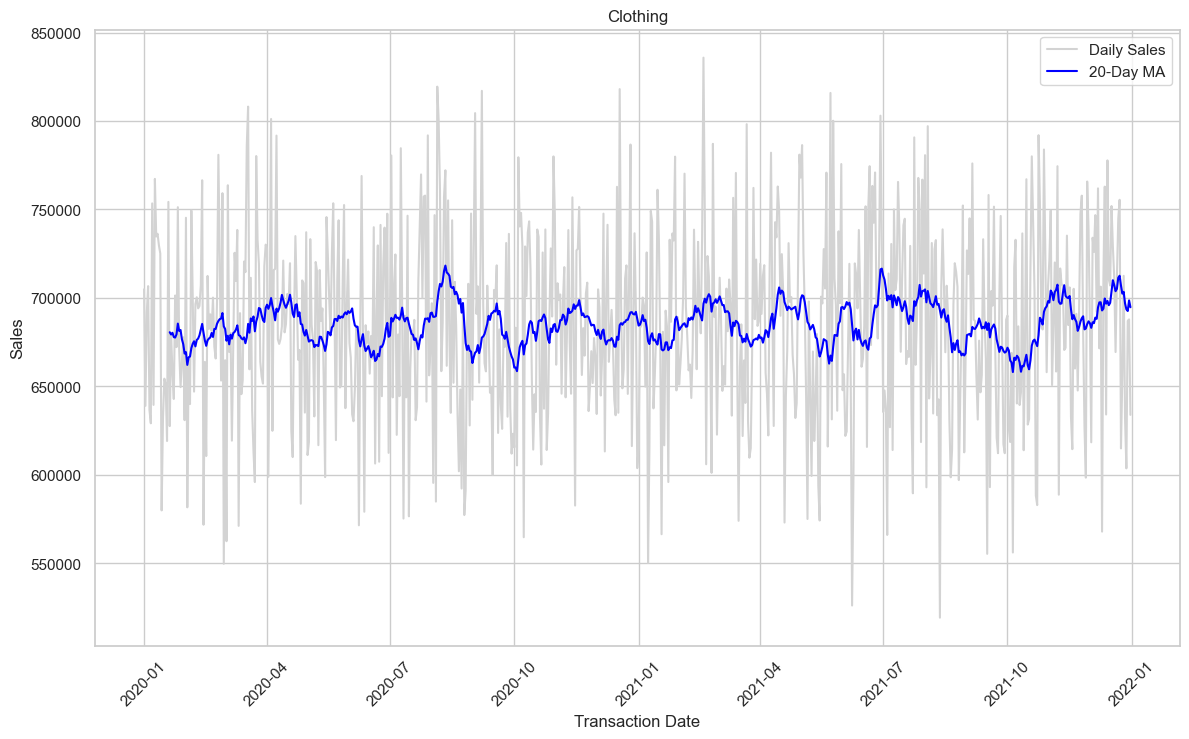

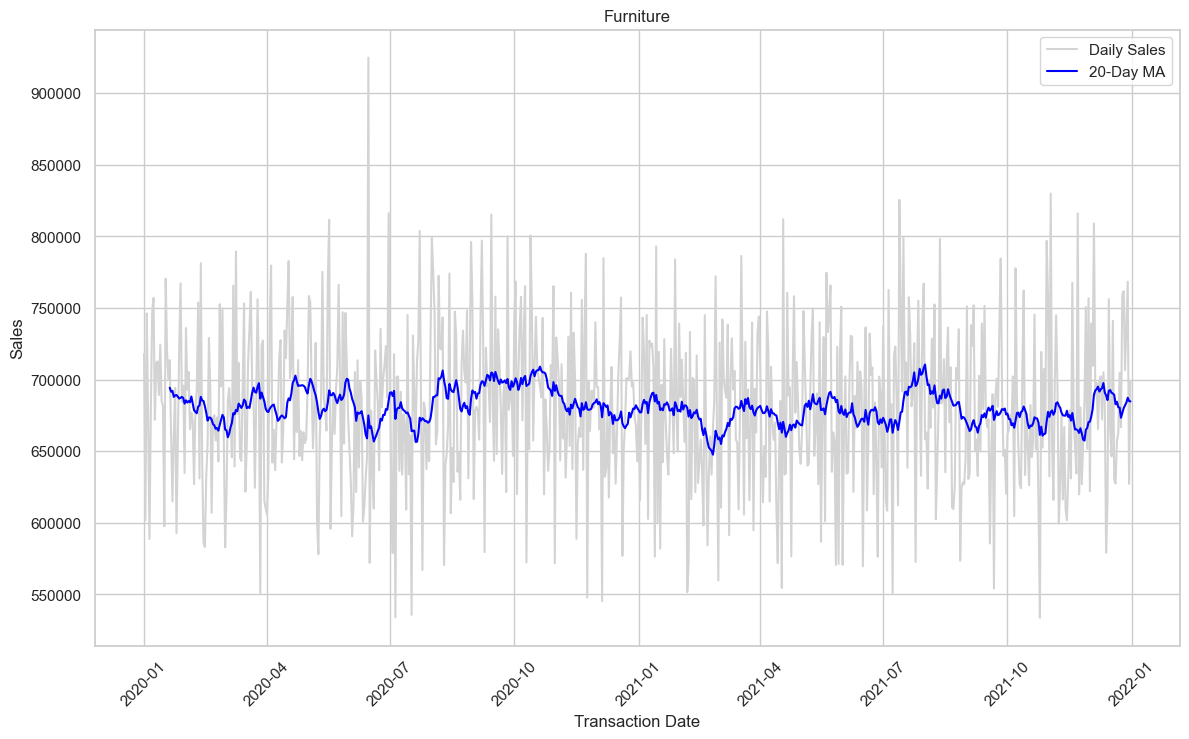

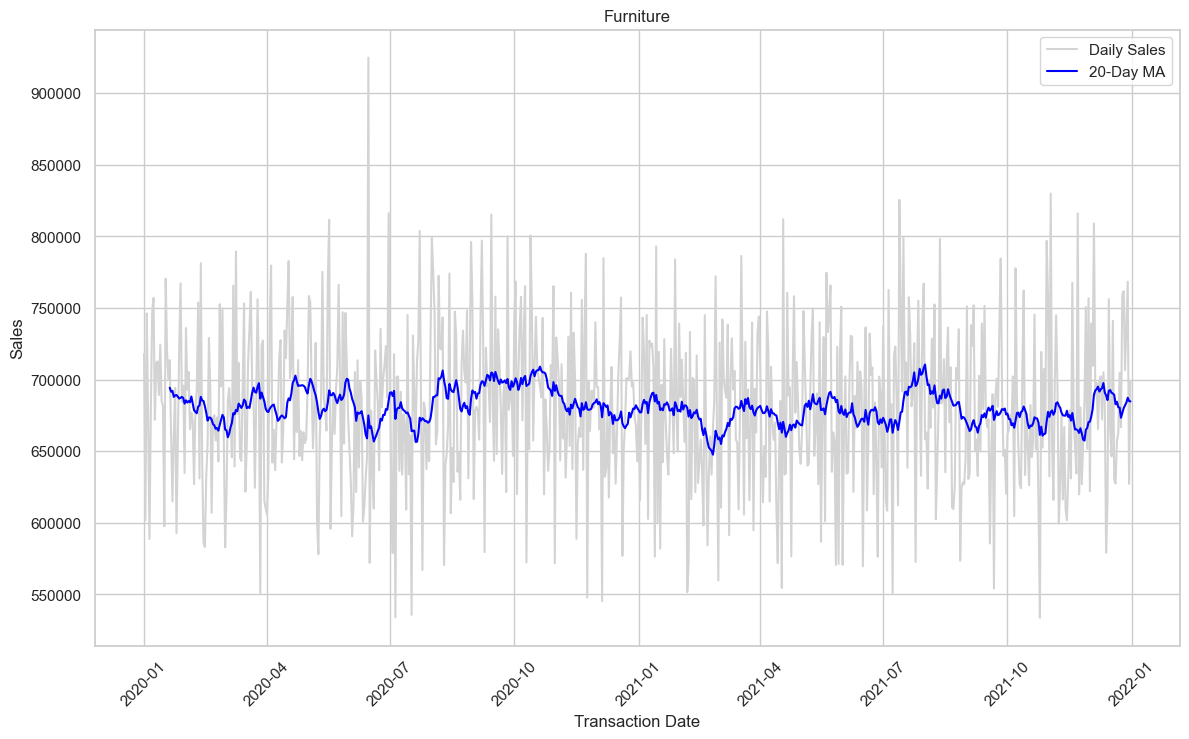

In [22]:
category = ['Electronics', 'Clothing', 'Electronics', 'Clothing', 'Furniture', 'Furniture']

for i in category:
  viz_sales_df = category_sales(i, sales_df)
  visualize_sales_df(viz_sales_df, i)

In [23]:
def total_sales_category(df, group_by_column='product_category', sales_column='sales', sort=False, handle_na=True):
    # Handle missing sales values if requested
    if handle_na:
        df[sales_column] = df[sales_column].fillna(0)
    
    # Group by the specified column and sum the sales for each group
    grouped_sales = df.groupby(group_by_column)[sales_column].sum().reset_index()
    
    # Sort by sales in descending order if requested
    if sort:
        grouped_sales = grouped_sales.sort_values(by=sales_column, ascending=False)
    
    # Format the sales column for better readability
    grouped_sales[sales_column] = grouped_sales[sales_column].apply(lambda x: f"${x:,.2f}")
    
    return grouped_sales

# Example usage
print(total_sales_category(sales_df, sort=True))


  product_category            sales
3        Groceries  $502,824,238.10
4             Toys  $502,740,937.39
0         Clothing  $500,859,262.72
1      Electronics  $499,369,939.09
2        Furniture  $497,886,231.66


In [24]:
def total_sales_store(df, group_by_column='store_location', sales_column='sales', sort=False, handle_na=True):
    # Handle missing sales values if requested
    if handle_na:
        df[sales_column] = df[sales_column].fillna(0)
    
    # Group by the specified column and sum the sales for each group
    grouped_sales = df.groupby(group_by_column)[sales_column].sum().reset_index()
    
    # Sort by sales in descending order if requested
    if sort:
        grouped_sales = grouped_sales.sort_values(by=sales_column, ascending=False)
    
    # Format the sales column for better readability
    grouped_sales[sales_column] = grouped_sales[sales_column].apply(lambda x: f"${x:,.2f}")
    
    return grouped_sales

# Example usage
print(total_sales_store(sales_df, sort=True))

  store_location            sales
2     Location C  $627,456,261.56
1     Location B  $626,326,741.60
0     Location A  $626,199,231.67
3     Location D  $623,698,374.13


In [26]:
def total_item_purchased(df):
    # Calculate total items purchased, returned, and total returned value
    total_purchased = df['total_items_purchased'].sum()
    total_returned = df['total_returned_items'].sum()
    total_returned_value = df['total_returned_value'].sum()
    
    # Format total returned value as currency
    formatted_total_returned_value = f"${total_returned_value:,.2f}"
    
    # Calculate the percentage of valid (non-returned) and returned items
    percentage_valid_items = ((total_purchased - total_returned) / total_purchased * 100)
    percentage_returned_items = (total_returned / total_purchased) * 100
    
    # Return results as a dictionary
    return {
        'total_purchased': total_purchased,
        'total_returned': total_returned,
        'percentage_valid_items': percentage_valid_items,
        'percentage_returned_items': percentage_returned_items,
        'total_returned_value': formatted_total_returned_value
    }

# Call the function
results = total_item_purchased(sales_df)

# Display the results
print(f"Total Purchased Items: {results['total_purchased']}")
print(f"Total Returned Items: {results['total_returned']}")
print(f"Valid Items Percentage: {results['percentage_valid_items']:.2f}%")
print(f"Returned Items Percentage: {results['percentage_returned_items']:.2f}%")
print(f"Total Returned Value: {results['total_returned_value']}")

Total Purchased Items: 250042763
Total Returned Items: 4498142
Valid Items Percentage: 98.20%
Returned Items Percentage: 1.80%
Total Returned Value: $500,387,837.37
